<a href="https://colab.research.google.com/github/SuhasTantri/Cardiovascular-Classification/blob/main/Raghavendra_Suhas_Team_Cardiovascular_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
3 #Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/Suhas Classification Project/Copy of data_cardiovascular_risk.csv')

In [32]:
# A look at the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [34]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [35]:
# Finding corelation among all the variables
df.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


In [36]:
# Checking for null values in the dataset
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [37]:
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

In [38]:
# Store the variables which have null values in a list
null_col=['cigsPerDay','BPMeds','totChol','BMI','glucose']


#**Handling Null Values**

In [39]:
# Replacing null values with mean
for x in null_col:
  df[x].fillna(df[x].mean(),inplace=True)

In [40]:
# Dropping the single row which has null value 
df.dropna(subset=['heartRate'],inplace=True)

In [41]:
df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [42]:
# Dropping the variables which are insignificant
df.drop(labels=['id','education'],inplace=True,axis=1)


In [43]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [44]:
# Creating the list of variables for which distribution plot needs to be plotted
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']

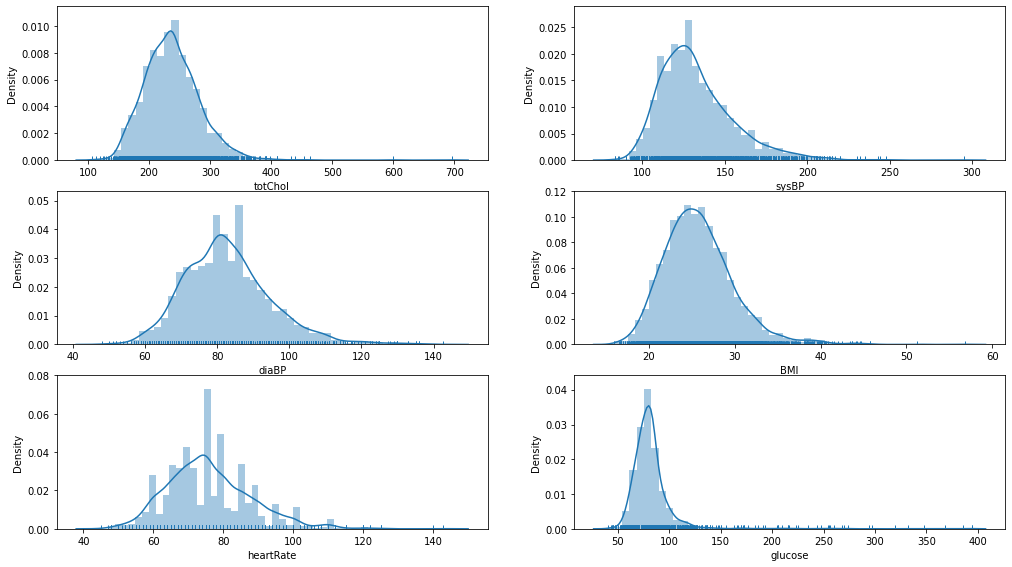

In [45]:
# Let's look at the distribution of the variables using distplot
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
  plt.subplot(4,2,i+1)
  sns.distplot(df[dist_col[i]],hist=True,rug=True)

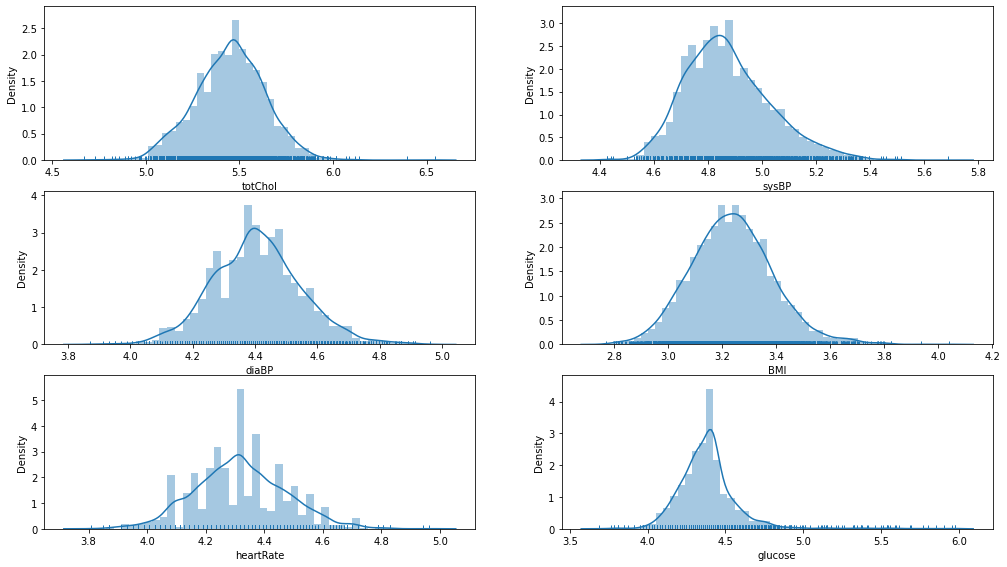

In [46]:
# Normalising the data using log transformation
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
  plt.subplot(4,2,i+1)
  sns.distplot(np.log(df[dist_col[i]]),hist=True,rug=True)

# ***Checking for outliers using box plot***

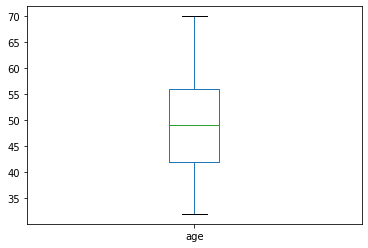

In [47]:

df.age.plot.box()

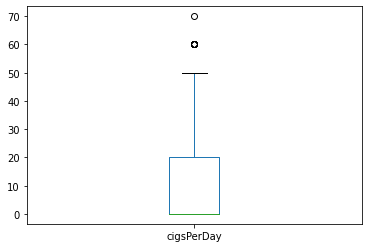

In [48]:
df.cigsPerDay.plot.box()

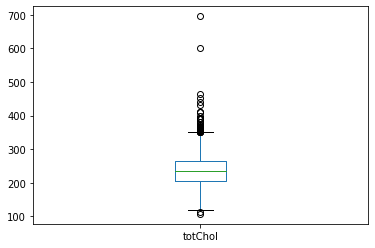

In [49]:
df.totChol.plot.box()

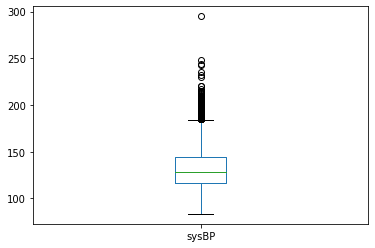

In [50]:
df.sysBP.plot.box()

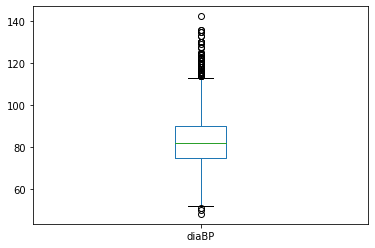

In [51]:
df.diaBP.plot.box()

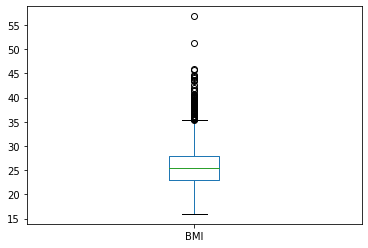

In [52]:
df.BMI.plot.box()

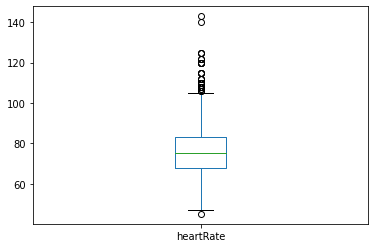

In [53]:
df.heartRate.plot.box()

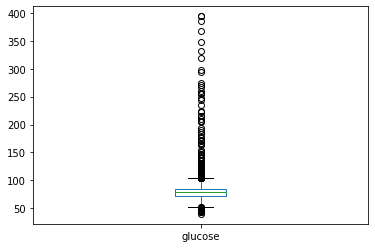

In [54]:
df.glucose.plot.box()

In [55]:

boxcol=['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [56]:
# Applying log transformation to the data to remove outliers
for i in boxcol:
  df[i]=np.log(df[i]+1)

In [57]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,1.386294,0.0,0,0,0,5.402677,5.003946,4.454347,3.288214,4.510860,4.394449,1
1,36,M,NO,0.000000,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0
2,46,F,YES,2.397895,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0
3,50,M,YES,3.044522,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1
4,64,F,YES,3.433987,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0


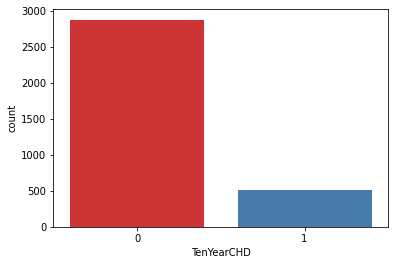

In [58]:
# Count plot 
sns.countplot(x='TenYearCHD',data=df,palette='Set1')


In [59]:
# Label encoding using lamba function
df['sex']=df['sex'].apply (lambda x:0 if x=='F' else 1 )
df['is_smoking']=df['is_smoking'].apply (lambda x:0 if x=='NO' else 1 )

In [60]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [61]:
# Applying SMOTE to over sample the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101)

# fit predictor and target variable
X, y = smote.fit_resample(df[['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']], df['TenYearCHD'])


In [101]:
# Creating a new oversampled dataframe
newdf=pd.DataFrame(X,columns=['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose'])
newdf['TenYearCHD']=y

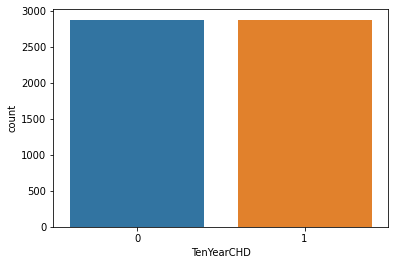

In [102]:
# Count plot ot check the balance of the data
sns.countplot(newdf['TenYearCHD'])

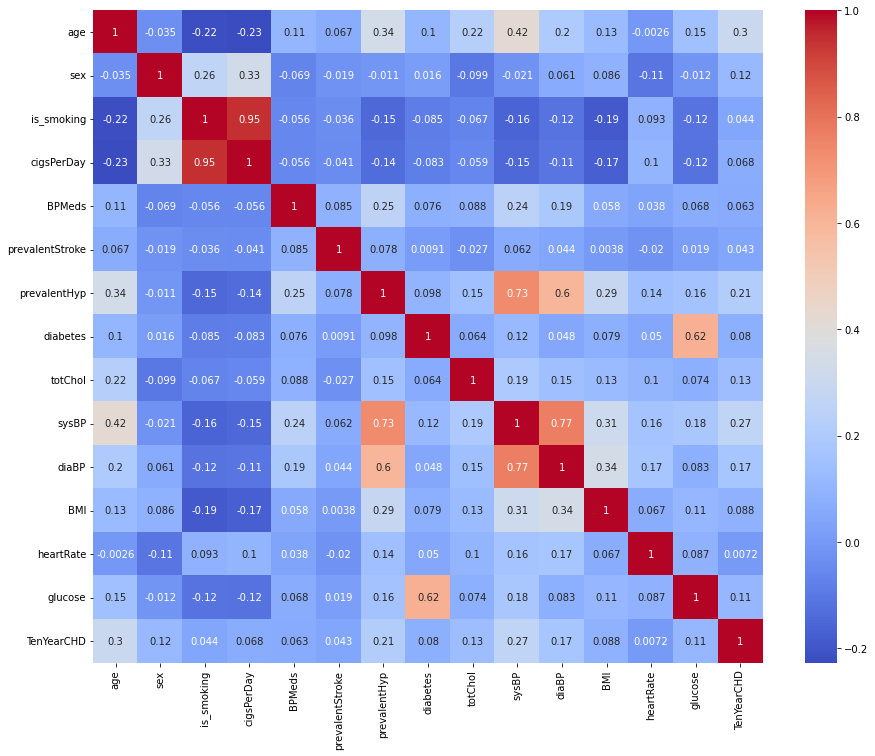

In [64]:
# Heatmap to see the correlation among the variables
plt.figure(figsize=(15,12))
correlation = newdf.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [65]:
# Preparing the data to scale down
newdf.pop(item='TenYearCHD')

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

In [66]:
# Applying standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [67]:
df=ss.fit_transform(newdf)
df=pd.DataFrame(df,columns=['age','sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose'])

In [68]:
df['TenYearCHD']=y

In [69]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.465104,-0.970414,0.976814,-0.037342,-0.201823,-0.094774,-0.807588,-0.193307,-0.390803,0.587693,0.132184,0.018580,1.274809,-0.073888,1
1,-1.778117,1.078124,-1.027241,-0.970338,-0.201823,-0.094774,1.288525,-0.193307,-0.625590,1.380177,1.137060,0.997282,-0.291699,-0.384969,0
2,-0.619824,-0.970414,0.976814,0.643479,-0.201823,-0.094774,-0.807588,-0.193307,0.305731,-0.933524,-1.136157,-1.588665,1.116857,0.704488,0
3,-0.156506,1.078124,0.976814,1.078668,-0.201823,-0.094774,1.288525,-0.193307,-0.092143,0.996403,0.376949,0.641261,-0.692231,0.704488,1
4,1.465104,-0.970414,0.976814,1.340783,-0.201823,-0.094774,-0.807588,-0.193307,0.098572,0.082309,0.132184,0.181728,-0.489144,-0.258148,0


In [70]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

# **Logistic Regression Model**

In [72]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=1000)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
predict=clf.predict(x_test)
predict1=clf.predict(x_train)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,classification_report,f1_score


In [107]:
# Evaluating logistic regression model using the metrics
test_accuracy = accuracy_score(y_test,predict)
cm = confusion_matrix(y_test,predict)
print("The accuracy of test data is", test_accuracy*100,'%')
print("The precision of test data is", precision_score(y_test,predict)*100 ,'%')
print("The recall of test data is", recall_score(y_test,predict)*100,'%')



The accuracy of test data is 65.41666666666667 %
The precision of test data is 66.33941093969145 %
The recall of test data is 64.70588235294117 %


In [108]:
print('The Confusion Matrix for test data is: \n',confusion_matrix(y_test,predict))

The Confusion Matrix for test data is: 
 [[469 240]
 [258 473]]


In [109]:
# Hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [110]:

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [111]:
grid_result = grid_search.fit(x, y)
print("Best accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best accuracy score: 0.662271 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


# **K Nearest Neighbor Model**

In [112]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

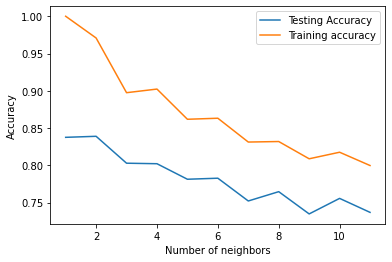

In [113]:
# Generate plot of test accuracy and train accuracy to determine k value

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [129]:
knn = KNeighborsClassifier(n_neighbors=9)

In [130]:
# Fitting the model

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [145]:
# Predicting the values of y_test 
y_pred = knn.predict(x_test)

In [146]:
# Evaluating KNN model using the metrics
print('The accuracy score of knn model is ',knn.score(x_test,y_test)*100,'%')
print('The precision score of knn model is ',precision_score(y_test,y_pred)*100,'%')
print('The recall score of knn model is ',recall_score(y_test,y_pred)*100,'%')

The accuracy score of knn model is  73.47222222222223 %
The precision score of knn model is  68.98803046789989 %
The recall score of knn model is  86.73050615595075 %


In [118]:
confusion_matrix(y_test,y_pred)

array([[424, 285],
       [ 97, 634]])

In [119]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [120]:
# Hyper parameter tuning
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [121]:
# Best possible score
knn_cv.best_score_

0.8520332561058017

In [122]:
# Best parameters to train data
knn_cv.best_params_

{'n_neighbors': 2}

# **Random Forest Classifier Model**

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [139]:
classifier = RandomForestClassifier(random_state=0)
grid_values = {'n_estimators':[50,80,100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values,scoring='roc_auc', cv=5)

In [140]:
# Fitting the model
classifier.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [141]:
# Evaluating the model using metrics
pred=classifier.predict(X_test)

print('The accuracy of the Random Forest model is',round((accuracy_score(Y_test,pred)*100),2) ,'%')
print('The precision of the Random Forest model is',round((precision_score(Y_test,pred)*100),2) ,'%')
print('The recall of the Random Forest model is',round((recall_score(Y_test,pred)*100),2) ,'%')

The accuracy of the Random Forest model is 82.9 %
The precision of the Random Forest model is 82.5 %
The recall of the Random Forest model is 83.51 %


In [142]:
print('The Confusion matrix of Random forest model is \n',confusion_matrix(Y_test,pred))

The Confusion matrix of Random forest model is 
 [[474 102]
 [ 95 481]]


In [143]:
classifier.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [144]:
classifier.best_score_

0.8609796709356548

# **Summary**

# 1. Handled majority of the null values by replacing them with mean values and dropped a row which had null value in heartrate column.

# 2.Treated the outliers using log transformation.

# 3.Handled the imbalanced class by applting SMOTE.

# 4.Standard Scaler was used to scale down the data.

# 5.Applied 3 machine learning models on the dataset i.e,

###- Logistic Regression.
###- K Nearest Neighbor.
###- Random Forest Classifier.

# 6.Hyperparameter tuning was performed on all the models to get best parameters and best scores.

# 7.Random Forest Model gave the highest accuracy score among all the three models with accuracy of 82.1 %.

